Importing librairies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz  # Make sure you have graphviz installed (pip install graphviz)

# Decision Trees

In the following, we are training a model on the dataset "dataset.csv".

In [2]:
##################
##### Code 1 #####
##################
# --- Load the data from the CSV file ---
try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'odataset.csv' was not found. ")
    exit() # Stop execution if the file is missing

# --- Separate features (X) and target (y) ---
X = df.drop('target', axis=1)
y = df['target']

# --- Parameters for the Data Splitting ---
random_seed = 42  # For reproducibility

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=random_seed)

# --- Train a Decision Tree (without restrictions initially) ---
tree = DecisionTreeClassifier(random_state=random_seed)  # No restrictions on depth, etc.
tree.fit(X_train, y_train)

# --- Evaluate Performance ---
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.780952380952381


**Question 1**: Analyse both accuracies and specify the encountered phenomenon.

**PS**: The highest testing accuracy that you can achieve for this dataset is 0.777778

Answer 1 here: so it is could do flawlessly in the training dataset but there are some flaw in the testing dataset. The model doesn't perform badly but the phenomenal happening here called **Overfitting** since they could track all the pattern in the training dataset

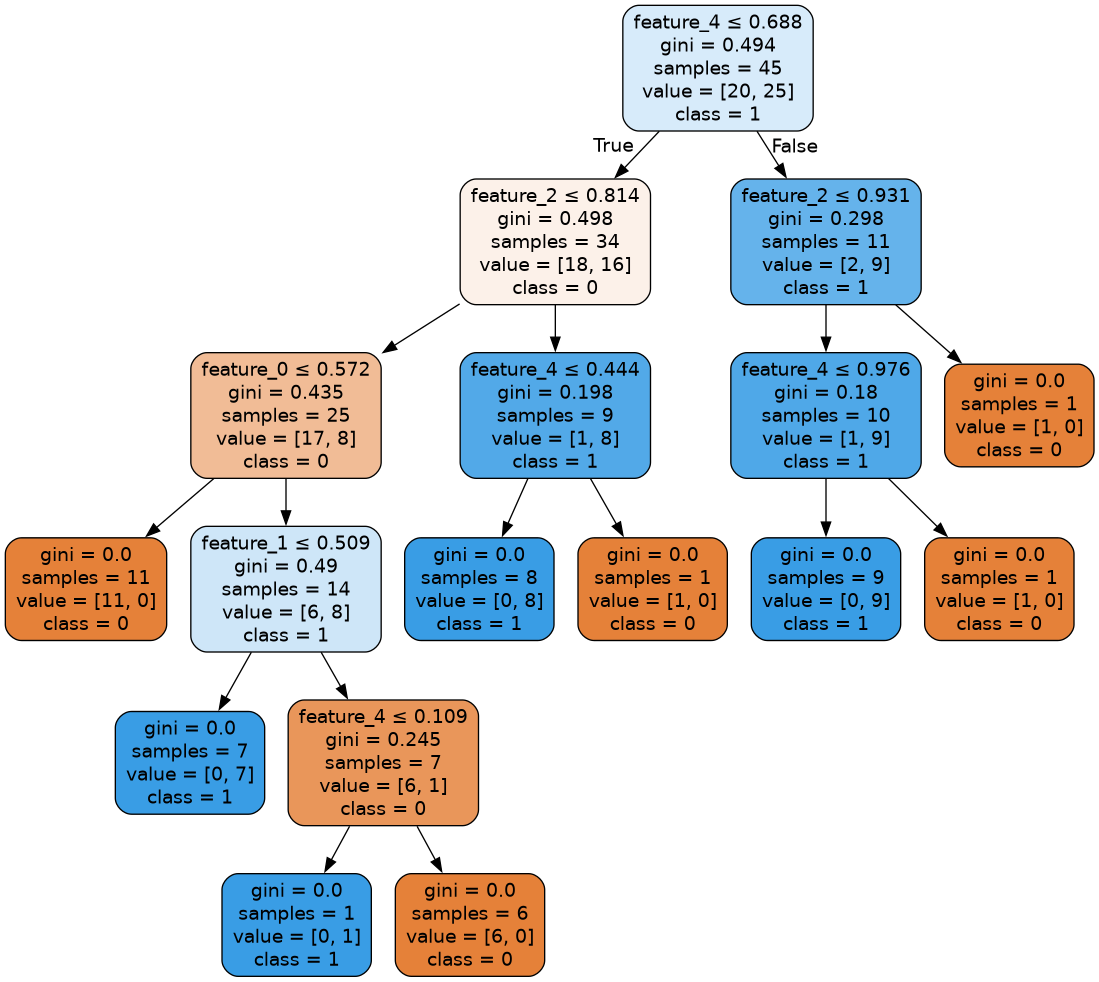

In [3]:
##################
##### Code 2 #####
##################
# Export the decision tree to a DOT format file
dot_data = export_graphviz(tree,
                           out_file=None,  # Don't save to a file directly
                           feature_names=X.columns,  # Use the feature names from your DataFrame
                           class_names=['0', '1'],  # Assuming your target classes are 0 and 1
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph to a PDF file (optional)
graph.render("decision_tree", view=True)  # Saves as decision_tree.pdf and opens it

# or, to display inline in a Jupyter Notebook:
from IPython.display import Image
Image(graph.pipe(format='png'))

**Question 2**: Raise at least one problem in the tree above.

*Answer 2 here*: as I said in the question before, The leaf nodes are all have gini impurity index of 0.0 So it is overfitting



**Question 3**: Copy Paste `Code 1` in the box below and experiment with different `test_size` values while training. Deduce.

In [4]:
##################
##### Code 1 #####
##################
# --- Load the data from the CSV file ---
try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'odataset.csv' was not found. ")
    exit() # Stop execution if the file is missing

# --- Separate features (X) and target (y) ---
X = df.drop('target', axis=1)
y = df['target']

# --- Parameters for the Data Splitting ---
random_seed = 42  # For reproducibility

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=random_seed)

# --- Train a Decision Tree (without restrictions initially) ---
tree = DecisionTreeClassifier(random_state=random_seed)  # No restrictions on depth, etc.
tree.fit(X_train, y_train)

# --- Evaluate Performance ---
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Testing Accuracy: 0.5384615384615384


*Answer 3 here*:
the training size increase and testing size decrease, it would prone to lower accuracy, because overfitting again, more data, more to overfit


**Question 4**: Copy Paste `Code 1` and `Code 2` in the box below and replace
line 22 by
```
tree = DecisionTreeClassifier(max_depth=3, random_state=random_seed)
```
Experiment with different values of `max_depth`. Deduce.

Training Accuracy: 0.8666666666666667
Testing Accuracy: 0.7523809523809524


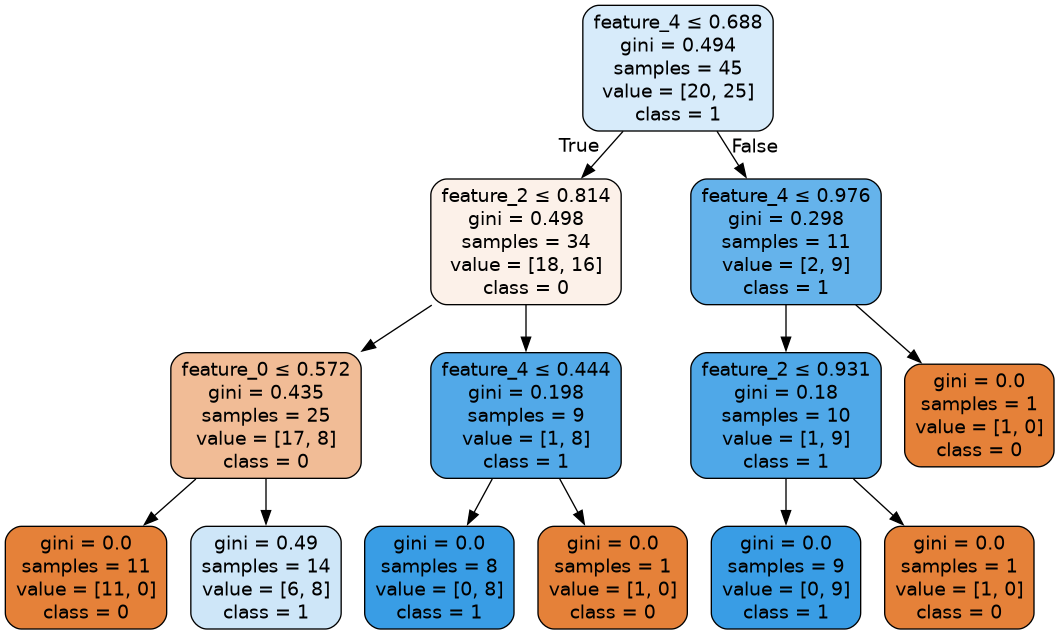

In [5]:
##################
##### Code 1 #####
##################
# --- Load the data from the CSV file ---
try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'odataset.csv' was not found. ")
    exit() # Stop execution if the file is missing

# --- Separate features (X) and target (y) ---
X = df.drop('target', axis=1)
y = df['target']

# --- Parameters for the Data Splitting ---
random_seed = 42  # For reproducibility

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=random_seed)

# --- Train a Decision Tree (without restrictions initially) ---
tree = DecisionTreeClassifier(max_depth=3, random_state=random_seed)
tree.fit(X_train, y_train)

# --- Evaluate Performance ---
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
##################
##### Code 2 #####
##################
# Export the decision tree to a DOT format file
dot_data = export_graphviz(tree,
                           out_file=None,  # Don't save to a file directly
                           feature_names=X.columns,  # Use the feature names from your DataFrame
                           class_names=['0', '1'],  # Assuming your target classes are 0 and 1
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph to a PDF file (optional)
graph.render("decision_tree", view=True)  # Saves as decision_tree.pdf and opens it

# or, to display inline in a Jupyter Notebook:
from IPython.display import Image
Image(graph.pipe(format='png'))

*Answer 4 here*:
it perform worse on training set since we limit the depth of tree so it couldn't capture all the pattern. But still, some leaf node only have 1 sample, when calculate information gain it would contribute pretty low on the total reduction of entropy so not the best practice to do.

**Question 5**: Copy Paste `Code 1` and `Code 2` in the box below and replace
line 22 by
```
tree = DecisionTreeClassifier(min_samples_split=5, random_state=random_seed)
```
Experiment with different values of `min_samples_split`. Don't hesitate to reach till 100. Deduce.

Training Accuracy: 1.0
Testing Accuracy: 0.780952380952381


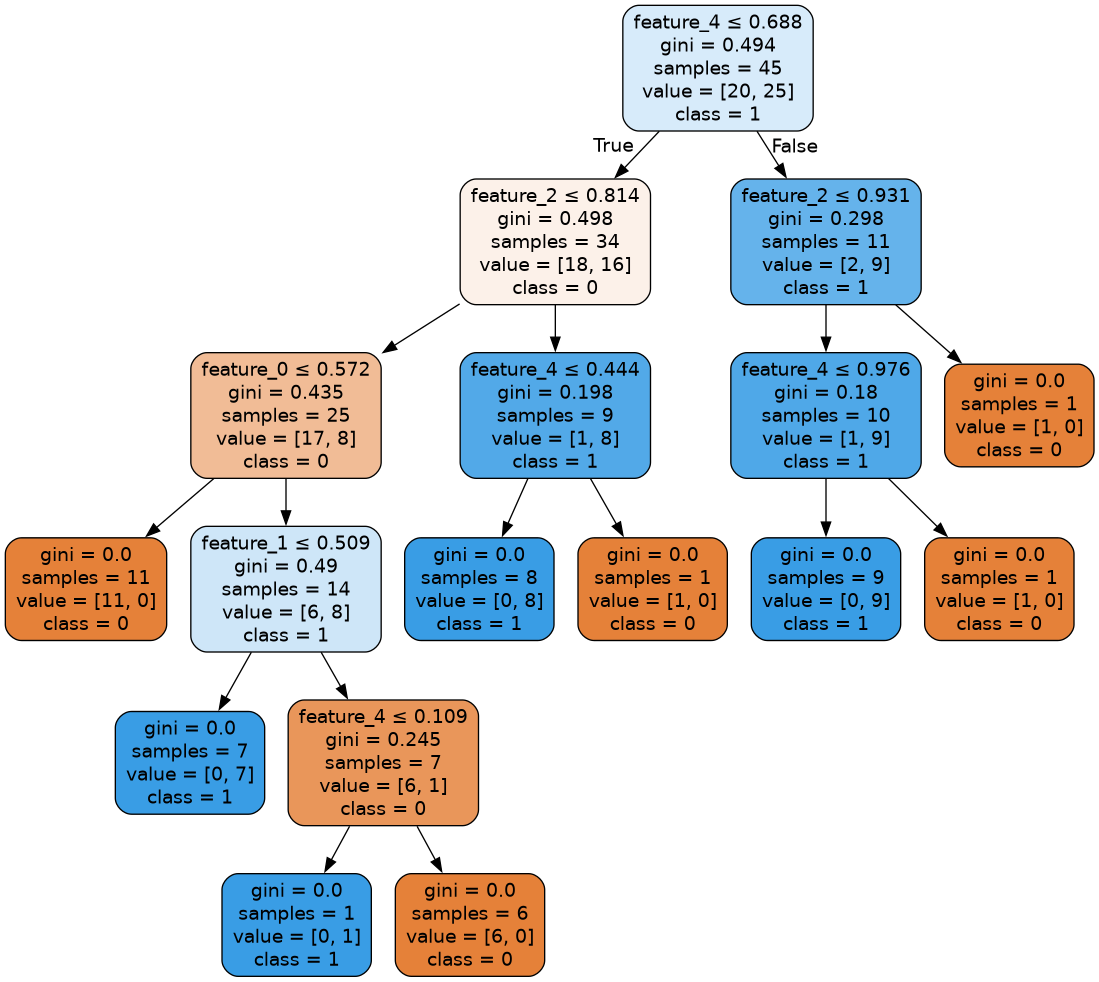

In [6]:

##################
##### Code 1 #####
##################
# --- Load the data from the CSV file ---
try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'odataset.csv' was not found. ")
    exit() # Stop execution if the file is missing

# --- Separate features (X) and target (y) ---
X = df.drop('target', axis=1)
y = df['target']

# --- Parameters for the Data Splitting ---
random_seed = 42  # For reproducibility

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=random_seed)

# --- Train a Decision Tree (without restrictions initially) ---
tree = DecisionTreeClassifier(min_samples_split=5, random_state=random_seed)
tree.fit(X_train, y_train)

# --- Evaluate Performance ---
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
##################
##### Code 2 #####
##################
# Export the decision tree to a DOT format file
dot_data = export_graphviz(tree,
                           out_file=None,  # Don't save to a file directly
                           feature_names=X.columns,  # Use the feature names from your DataFrame
                           class_names=['0', '1'],  # Assuming your target classes are 0 and 1
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph to a PDF file (optional)
graph.render("decision_tree", view=True)  # Saves as decision_tree.pdf and opens it

# or, to display inline in a Jupyter Notebook:
from IPython.display import Image
Image(graph.pipe(format='png'))

*Answer 5 here*:
so now, it could capture all the pattern in the training, and perform better on testing, means no overfitting. max-depth to prevent overfit and min-split to make sure it would not split if there is no less than 5 samples there


**Question 6**: Copy Paste `Code 1` and `Code 2` in the box below and replace
line 22 by
```
tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=random_seed)
```
Experiment with different values of `min_samples_leaf`. Don't hesitate to reach till 100. Deduce.

Training Accuracy: 0.9111111111111111
Testing Accuracy: 0.7714285714285715


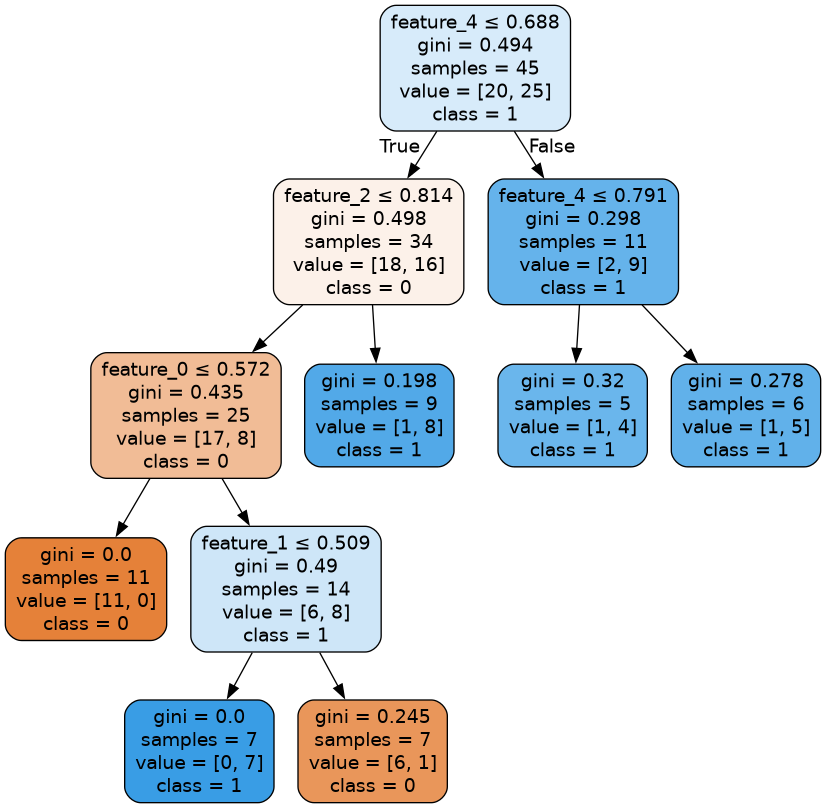

In [7]:

##################
##### Code 1 #####
##################
# --- Load the data from the CSV file ---
try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: The file 'odataset.csv' was not found. ")
    exit() # Stop execution if the file is missing

# --- Separate features (X) and target (y) ---
X = df.drop('target', axis=1)
y = df['target']

# --- Parameters for the Data Splitting ---
random_seed = 42  # For reproducibility

# --- Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=random_seed)

# --- Train a Decision Tree (without restrictions initially) ---
tree = DecisionTreeClassifier(min_samples_leaf=5, random_state=random_seed)
tree.fit(X_train, y_train)

# --- Evaluate Performance ---
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
##################
##### Code 2 #####
##################
# Export the decision tree to a DOT format file
dot_data = export_graphviz(tree,
                           out_file=None,  # Don't save to a file directly
                           feature_names=X.columns,  # Use the feature names from your DataFrame
                           class_names=['0', '1'],  # Assuming your target classes are 0 and 1
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the graph to a PDF file (optional)
graph.render("decision_tree", view=True)  # Saves as decision_tree.pdf and opens it

# or, to display inline in a Jupyter Notebook:
from IPython.display import Image
Image(graph.pipe(format='png'))

*Answer 6 here*: again, as prevent leaf node that has less than 5, so contribution of total entropy of parent node will be significant



**Question 7**: Copy Paste `Code 1` and `Code 2` in the box below and experiment with a combination of the 3 hyperparemeters.

In [10]:
max_depth = []
min_split = []
min_leaf = []
train_acc = []
test_acc = []
def testHyperParam(maxdepth,minsplit,minleaf):
    tree = DecisionTreeClassifier(max_depth=maxdepth,min_samples_split=minsplit,min_samples_leaf=minleaf)
    tree.fit(X_train,y_train)

    max_depth.append(maxdepth)
    min_split.append(minsplit)
    min_leaf.append(minleaf)
    train_acc.append(accuracy_score(y_train,tree.predict(X_train)))
    test_acc.append(accuracy_score(y_test,tree.predict(X_test)))

for md in range(1,20):
    for ms in range(2,20):
        for ml in range(2,20):
            testHyperParam(md,ms,ml)

In [19]:
df = pd.DataFrame({
    "max_depth" : max_depth,
    "min_split" : min_split,
    "min_leaf" : min_leaf,
    "train_acc" : train_acc,
    "test_acc" : test_acc
})
df["diff"] = df["train_acc"]-df["test_acc"]

overfit = df[df["diff"]== df["diff"].max()].iloc[[0]]
underfit = df[(df["train_acc"] == df["train_acc"].min()) & (df["test_acc"] == df["test_acc"].min())].iloc[[0]]
performance = df[(df["train_acc"] == df["train_acc"].max()) & (df["test_acc"] == df["test_acc"].max())].iloc[[0]]
good_balance = df[df["test_acc"] == df.test_acc.max()].iloc[[0]]

# display(max_train_acc_rows)
result_df = pd.concat([overfit,underfit,performance,good_balance])
result_df.index = ["overfit","underfit","performance","good_balance"]
display(result_df)

,max_depth,min_split,min_leaf,train_acc,test_acc,diff
overfit,6,6,3,0.911111,0.647619,0.263492
underfit,1,2,2,0.600000,0.438095,0.161905
performance,4,5,3,0.933333,0.790476,0.142857
good_balance,4,2,4,0.911111,0.790476,0.120635


Fill in by a possible answer.
> i put all the answer in the df, so it is easier to see

**Specific Hyperparameter Combinations to Highlight**


*Severe Overfitting*
*   max_depth:
*   min_samples_split:
*   min_samples_leaf:
*   Training Accuracy:
*   Testing Accuracy:

*Good Balance*
*   max_depth:
*   min_samples_split:
*   min_samples_leaf:
*   Training Accuracy:
*   Testing Accuracy:


*Underfitting*
*   max_depth:
*   min_samples_split:
*   min_samples_leaf:
*   Training Accuracy:
*   Testing Accuracy:

*Best Performance*
*   max_depth:
*   min_samples_split:
*   min_samples_leaf:
*   Training Accuracy:
*   Testing Accuracy:

